In [26]:
# https://seaborn.pydata.org/tutorial/regression.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jeolmuni/jeolmuni/master/study-group/2018_InternationalTravelBehavior.csv', delimiter = '\t')


In [3]:
df.head()

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1,Q3A1,Q3A2,Q3A3,...,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY
0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,13,1,3,1,1,1,1,0.258338,12,1513
1,1,2.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,2,1,5,1,1,1,1,1.497972,2,204
2,6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2,2,2,1,1,4,2,1.806581,2,211
3,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2,2,2,1,1,2,2,1.609837,2,253
4,3,3.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,2,2,3,1,1,3,2,1.872946,2,201


In [ ]:
df.info('COUNTRY')

In [4]:
sns.set(color_codes = True)

## Functions to draw linear regression models¶

#### Two main functions in seaborn are used to visualize a linear relationship as determined through regression: regplot() and lmplot()

In [5]:
# the relationship between length of stay (MQ10_3A2) and expenditure (MQ14_1T)

df['log_LOS'] = ''
#df['log_LOS'] = NaN
df['log_Exp'] = ''

In [6]:
df['log_LOS'] = np.log(df['MQ10_3A2'])
df['log_Exp'] = np.log(df['MQ14_1T'])

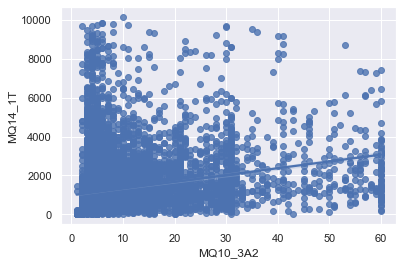

In [7]:
sns.regplot(x='MQ10_3A2', y='MQ14_1T', data=df)
#sns.regplot(x='MQ10_3A2', y='Q15_1', data=df)


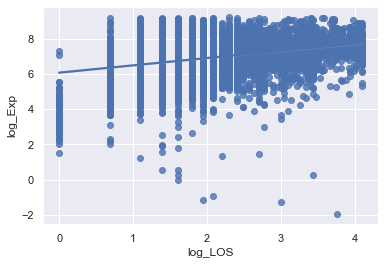

In [8]:
sns.regplot(x='log_LOS', y='log_Exp', data=df)

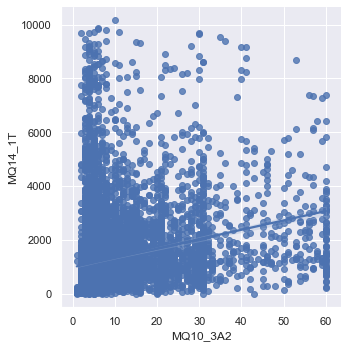

In [9]:
sns.lmplot(x='MQ10_3A2', y='MQ14_1T', data=df)

In [ ]:
# adding 'jitter':  some random noise (“jitter”) to the discrete values to make the distribution of those values more clear
sns.lmplot(x='MQ10_3A2', y='MQ14_1T', data=df, x_jitter=.05)

In [ ]:
# To collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval
sns.lmplot(x='MQ10_3A2', y='MQ14_1T', data=df, x_estimator = np.mean)



# Fitting different kinds of models¶


In [10]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(50)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
sns.lmplot(x = 'x', y = 'y', data = anscombe)

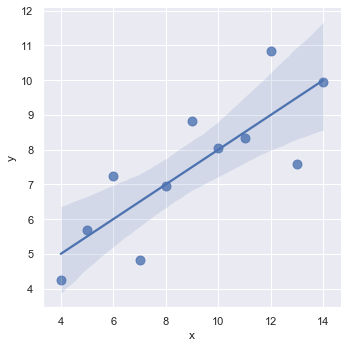

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), 
           ci=None, scatter_kws={"s": 80}); #ci refers to confidence interval

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), 
           ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"), 
           ci=None, scatter_kws={"s": 80});

In [ ]:
# a polynomial regression model to explore simple kinds of nonlinear trends
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2,
           ci=None, scatter_kws={"s": 80});


In [ ]:
#to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True,
           ci=None, scatter_kws={"s": 80});


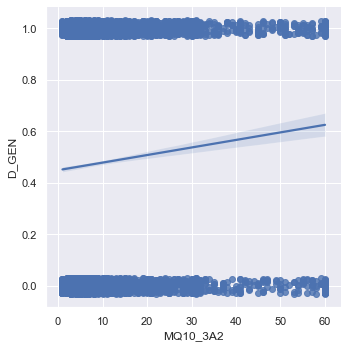

In [15]:
# binary variable (D_GEN: 성별) 0 - 여자, 1 - 남자 
df['D_GEN'].replace(2,0, inplace=True)
df['D_GEN']

sns.lmplot(x='MQ10_3A2', y='D_GEN', data=df, y_jitter=0.03)

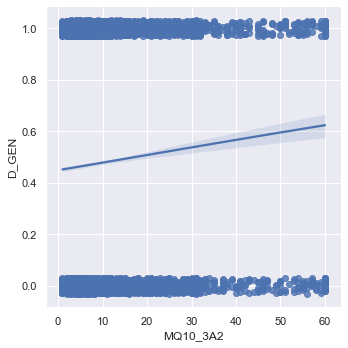

In [16]:
sns.lmplot(x='MQ10_3A2', y='D_GEN', 
           logistic = True, data=df, y_jitter=0.03)

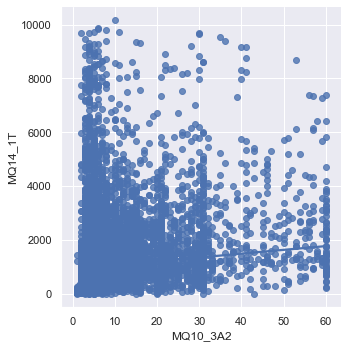

In [19]:
# to fit a nonparametric regression using a lowess smoother
sns.lmplot(x='MQ10_3A2', y='MQ14_1T', data=df, lowess=True)

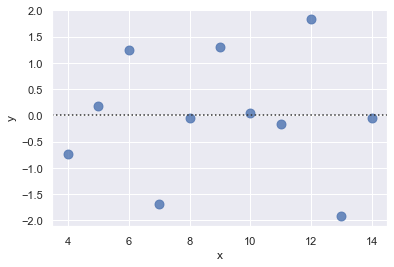

In [24]:
# residplot(): for checking whether the simple regression model is appropriate for a dataset.

sns.residplot(x='x', y='y', data=anscombe.query("dataset=='I'"), scatter_kws={"s":80});


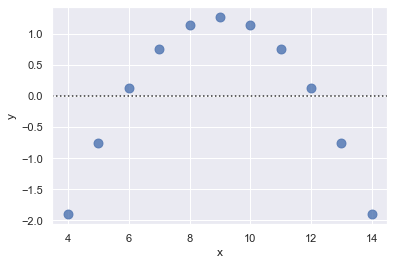

In [25]:
#If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

sns.residplot(x='x', y='y', data=anscombe.query("dataset=='II'"), scatter_kws={"s":80});


# Conditioning on other variables¶
### To address  “how does the relationship between these two variables change as a function of a third variable?”
#### While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables


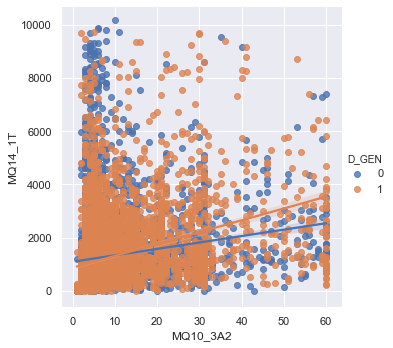

In [27]:
# To consider a categorical variable
sns.lmplot(x='MQ10_3A2', y='MQ14_1T', hue='D_GEN', data=df); #hue: Grouping variable

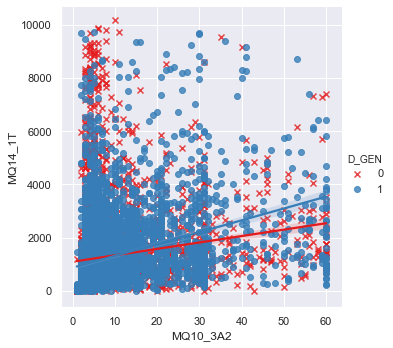

In [30]:
# to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

sns.lmplot(x='MQ10_3A2', y='MQ14_1T', hue='D_GEN', data=df, markers=['x', 'o'], palette='Set1');



In [36]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


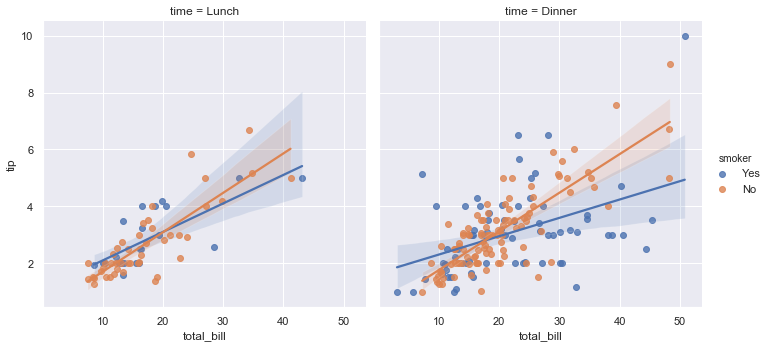

In [37]:
# To add another variable, 
#you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);


In [43]:
df['D_GEN'].replace('여자',"female", inplace=True)
df['D_GEN'].replace('남자',"male", inplace=True)

df['D_GEN']


0          male
1          male
2        female
3        female
4        female
          ...  
16464    female
16465      male
16466    female
16467      male
16468    female
Name: D_GEN, Length: 16469, dtype: object

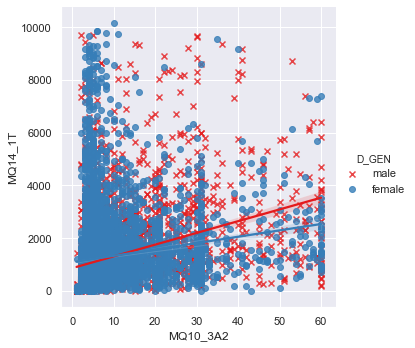

In [44]:
sns.lmplot(x='MQ10_3A2', y='MQ14_1T', hue='D_GEN', data=df, markers=['x', 'o'], palette='Set1');


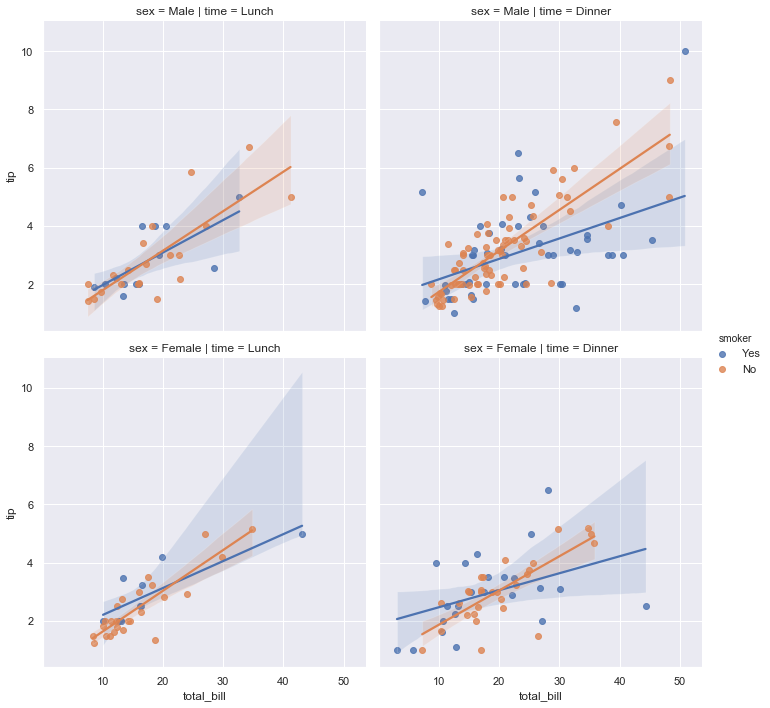

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);